In [1]:
import pandas as pd
import os
import numpy as np
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot as plt


from google.colab import drive
drive.mount('/content/drive')
%cd "/content/drive/My Drive/Data Science Project/data"
data_train = pd.read_csv("train.csv")
data_test = pd.read_csv("test.csv")
data_bids = pd.read_csv("bids.csv")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Data Science Project/data


In [0]:
data_bids = data_bids.replace({' ': ''}, regex = True)
data_bids_sorted = data_bids.sort_values(by=['bidder_id', 'time'], ascending = [True, True]) ##sorting the data by the bidder_id and time 
bids = pd.DataFrame(data = data_bids_sorted["bidder_id"].unique(), columns = ["bidder_id"], index = data_bids_sorted["bidder_id"].unique()) 

In [0]:
counts = data_bids_sorted["bidder_id"].value_counts()
bids["auction_count_num"] = counts
timediff = data_bids_sorted.groupby("bidder_id")["time"].diff()
timediff_str = timediff.astype(str).fillna('')
data_bids_sorted["timediff_num"] = timediff
data_bids_sorted["timediff"] = timediff_str

In [0]:
text_cols = ["auction", "merchandise", "device", "timediff", "country", "ip", "url"]
for col in text_cols:
    text_str = col + "s"
    count_str = col + "_nunique_num"
    bids[text_str] = data_bids_sorted.groupby("bidder_id")[col].unique()
    bids[count_str]  = data_bids_sorted.groupby("bidder_id")[col].nunique()

In [0]:
max_time = data_bids_sorted.groupby("bidder_id")["time"].max()
bids["maxtime"] = max_time
min_time = data_bids_sorted.groupby("bidder_id")["time"].min()
bids["mintime"] = min_time
max_diff = data_bids_sorted.groupby("bidder_id")["timediff_num"].max()
max_diff = max_diff.fillna(max_diff.mean())
bids['maxdiff_num'] = max_diff
min_diff = data_bids_sorted.groupby("bidder_id")["timediff_num"].max()
min_diff = min_diff.fillna(min_diff.mean())
bids['mindiff_num'] = min_diff

In [0]:
overall_train = data_train.merge(data_bids,on="bidder_id")
count_stats = pd.DataFrame(columns = ["country", "count","total","prob"])
for i in data_bids["country"].unique():
  count = overall_train.loc[overall_train["country"] == i]["outcome"].sum()
  total = len(overall_train.loc[overall_train["country"] == i]["outcome"])
  if(count != 0 and total >= 10):
    count_stats = count_stats.append({"country" : i, "count": count, "total": total,"prob" : count/total},ignore_index=True)

In [10]:
count_stats.dropna()

,country,count,total,prob
0,us,66663.0,140043,0.476018
1,in,86386.0,645631,0.133801
2,py,217.0,6126,0.035423
3,ru,11100.0,53874,0.206036
4,th,17282.0,84714,0.204004
...,...,...,...,...
171,bt,3.0,12,0.250000
172,re,6.0,14,0.428571
173,bm,5.0,14,0.357143
174,pg,3.0,292,0.010274


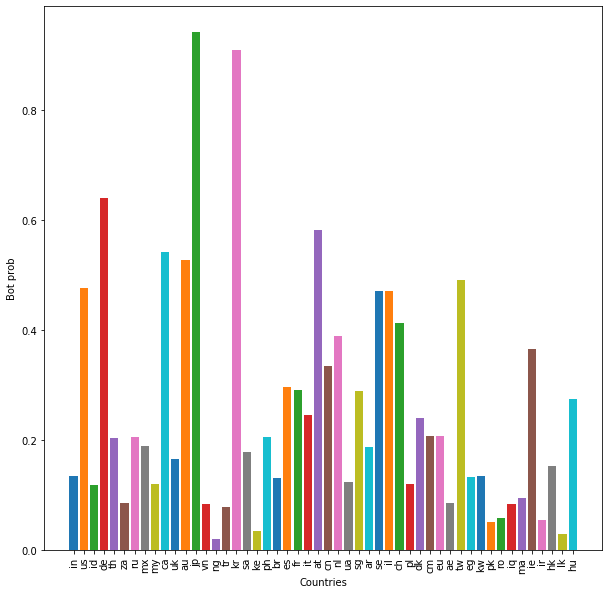

In [11]:
count_stats = count_stats.sort_values(by=["count","total", "prob"], ascending = [False,False,False])
count_stats
plt.figure(figsize=(10,10))
for i in count_stats["country"][:50]:
     plt.bar(i,count_stats.loc[count_stats["country"] == i]["prob"])
plt.xlabel("Countries")
plt.ylabel("Bot prob")
plt.xticks(rotation = 90)
plt.show()

In [14]:
count_stats.loc[count_stats["country"] == "jp"]

,country,count,total,prob
72,jp,7921.0,8419,0.940848


In [0]:
device_stats = pd.DataFrame(columns = ["numDevices", "prob"])
for i in bids["device_nunique_num"].unique()[:1]:
  count = 0
  total = 0 
  data = bids[bids["device_nunique_num"] == i]
  for j in data["bidder_id"]:
    print(j)
    if j in overall_train["bidder_id"].unique():
      print(j)
      d = overall_train.loc[overall_train["bidder_id"] == j]["outcome"].unique()
      if(d == 1):
        count += 1 
        total += 1 
      else:
        total += 1
  if(count != 0):
    device_stats = device_stats.append({"device_num" : i, "count": count, "total": total,"prob" : count/total},ignore_index=True)

      

001068c415025a009fee375a12cff4fcnht8y
001068c415025a009fee375a12cff4fcnht8y
0030a2dd87ad2733e0873062e4f83954mkj86
0030a2dd87ad2733e0873062e4f83954mkj86
00862324eb508ca5202b6d4e5f1a80fc3t3lp
009479273c288b1dd096dc3087653499lrx3c
00dd948c3a88f7b68f1952dbeeac68ffb6qoc
0176025cc599cb59f825d592b8ef3ee3p5aqv
018c9ecc065880c95e21c0291a3b478dj1c0a
01f498a0992d280de63ec346692efb2blckg2
01f498a0992d280de63ec346692efb2blckg2
024937af9ea18a2b57e4f08762d181f7s8a3z
024937af9ea18a2b57e4f08762d181f7s8a3z
02615aa755c78f1812d7f772f4ed3d8anist8
026819504b59bc4eefb9963d5fe4271aql15u
026819504b59bc4eefb9963d5fe4271aql15u
02acbacd7a029481f44d5a2e2d3fb0b6xe0gx
02cfc97e8fded77671e71e1951723d5fwz6a4
02cfc97e8fded77671e71e1951723d5fwz6a4
02de68074ee2edccf6a00dfbd3213269w7k7i
03757ddf8a00f5c600241f3ce956ad7bfv7tw
0381a69b7a061e9ace2798fd48f1f537mgq57
0381a69b7a061e9ace2798fd48f1f537mgq57
038d5c12a210df3818eb8dc34ebedac2ldr62
03b57948c18680b55b6e9ba10eeac42659hsj
03cac5cc349396386e833a24543980cckfhyu
042d1cd843d8

In [100]:
data["bidder_id"]

001068c415025a009fee375a12cff4fcnht8y    001068c415025a009fee375a12cff4fcnht8y
0030a2dd87ad2733e0873062e4f83954mkj86    0030a2dd87ad2733e0873062e4f83954mkj86
00862324eb508ca5202b6d4e5f1a80fc3t3lp    00862324eb508ca5202b6d4e5f1a80fc3t3lp
009479273c288b1dd096dc3087653499lrx3c    009479273c288b1dd096dc3087653499lrx3c
00dd948c3a88f7b68f1952dbeeac68ffb6qoc    00dd948c3a88f7b68f1952dbeeac68ffb6qoc
                                                         ...                  
fecea7c93f6fc416ab1165267723b0bewb7le    fecea7c93f6fc416ab1165267723b0bewb7le
ff375d34745157a44e3ba3de0f30dd1bhypuh    ff375d34745157a44e3ba3de0f30dd1bhypuh
ff5069626488d0409be146cff3f1f2eak2n7a    ff5069626488d0409be146cff3f1f2eak2n7a
ffd29eb307a4c54610dd2d3d212bf3bagmmpl    ffd29eb307a4c54610dd2d3d212bf3bagmmpl
fff2c070d8200e0a09150bd81452ce29ngcnv    fff2c070d8200e0a09150bd81452ce29ngcnv
Name: bidder_id, Length: 1452, dtype: object

In [109]:
d = overall_train.loc[overall_train["bidder_id"] == j]["outcome"].unique()
print(d)

[0.]
